In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='white')

In [148]:
path = "../processed/evaluated/evaluated_448_03_03_2024.csv"

In [149]:
df = pd.read_csv(path)

In [150]:
df.head(3)

,id,instructions,text,kgw-watermarked,non-watermarked,pp-kgw-para-1,pp-unwatermarked-para-1,pp-kgw-para-2,pp-unwatermarked-para-2,pp-kgw-para-3,...,kgw-sent-zscore-1,nowm-sent-zscore-2,nowm-sent-zscore-3,nowm-sent-zscore-1,kgw-word-zscore-2,kgw-word-zscore-3,kgw-word-zscore-1,nowm-word-zscore-2,nowm-word-zscore-3,nowm-word-zscore-1
0,DBE977177080,\nTask: Analyze why it is important to be awar...,Have you ever found something on the ground an...,title: Respecting Other people's Property: Aw...,Title: Respecting Others' Belongings: The Imp...,"In fact, the mindfulness required to refrain f...",The Importance of Mindfulness for the Purposes...,The awareness of one’s actions in the case of ...,The importance of mindfulness in the purpose o...,The awareness of one’s actions in the case of ...,...,2.063071,-0.859210,-1.433455,-0.498755,9.287433,6.021877,3.201285,0.721336,1.882065,1.797434
1,92B8F2F85C44,\n\nTask: Write an essay discussing how attemp...,"Although some say ""Unless you have try to do s...",title: Stepping out of Comfort Zones: The Val...,Stepping outside of our comfort zone and atte...,"... “Tie the Up!” For example, when I was a ne...",""" Let us embrace the unknown and harness the p...",The value of overcoming obstacles lies in the ...,", we should embrace the unknown and use the po...","I remember when I was a beginner, I sat down f...",...,1.408721,0.324443,1.310081,0.503953,5.333499,2.958109,2.199888,-0.421637,-0.258199,-0.506370
2,7B6FA03518AE,\nTask: Research the benefits of developing pa...,People who does not have patient cannot make a...,title: The Value of Patience and Precision in...,Patience is an essential virtue in achieving ...,“Prayer and precision in the pursuit of good g...,It is the essential virtue in the pursuit of s...,- Patience and the constant pursuit of perfect...,It is an essential virtue in the pursuit of su...,‘Patience and constant pursuit of perfection a...,...,-0.180334,-1.244342,0.110096,0.284440,4.140568,2.975609,2.867518,-0.514344,-0.577350,-0.949158


In [151]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [152]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [153]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-para-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"nowm-para-zscore-{i}"]

In [154]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [155]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: 11.7506, pp mean: 0.1326
base std: 2.9984, pp mean: 1.0323


In [156]:
image_path = "../results/images/z_score_comparisons_february/"

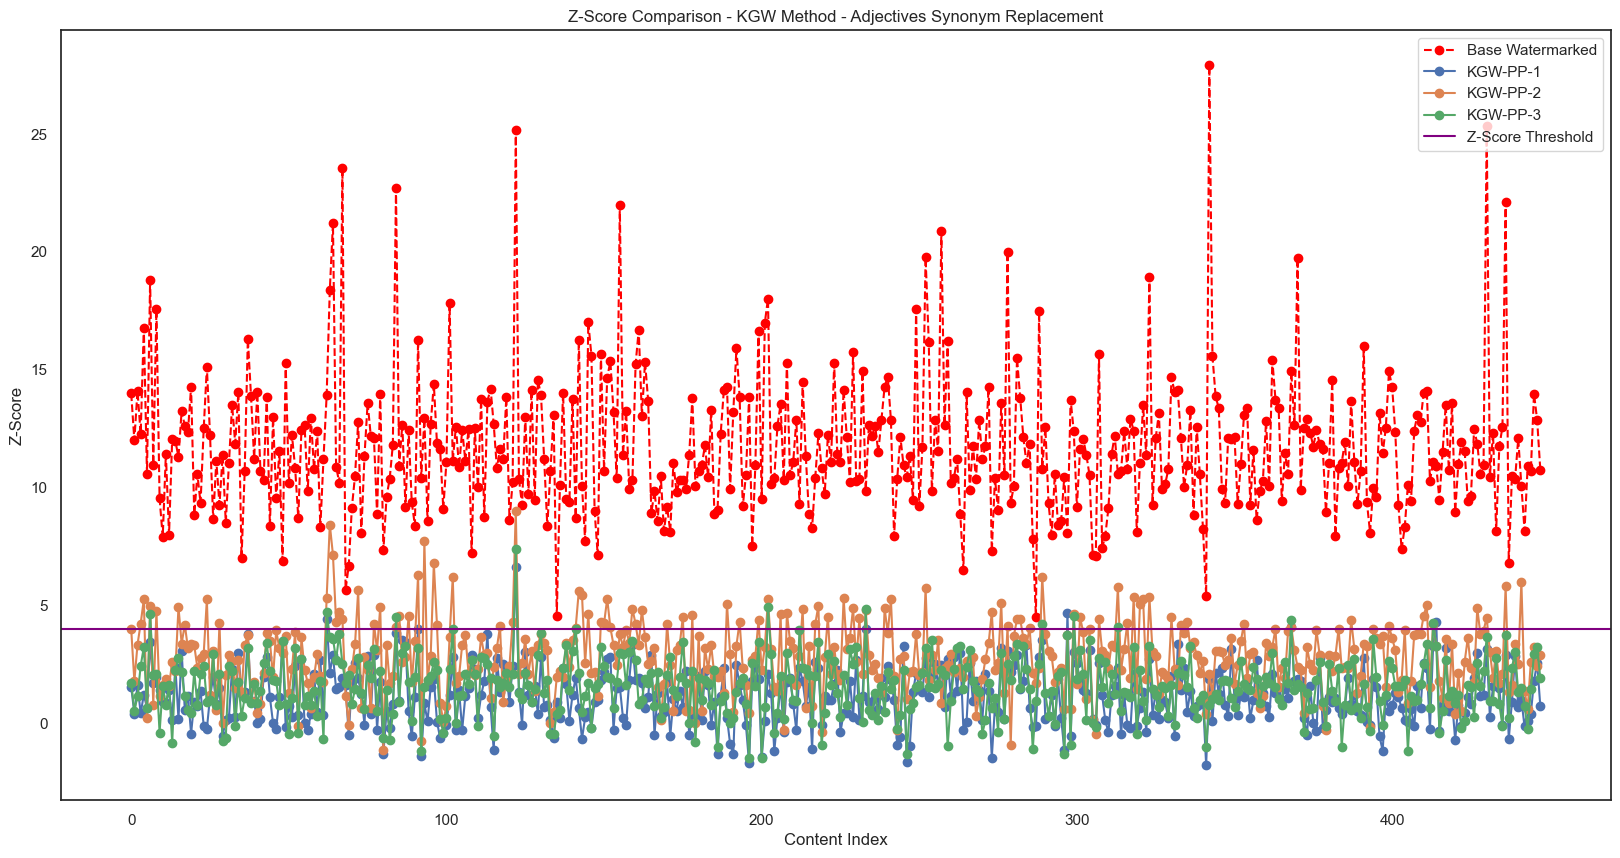

In [157]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(no_of_paraphrases):
    axs.plot(list(range(len(kgw_wm_zscore))), wmarked_paraphrased_scores[i], label=f"KGW-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method - Adjectives Synonym Replacement")
axs.legend(loc='upper right')
# plt.savefig(image_path+"word_replaced_kgw_20%.png")
plt.show()

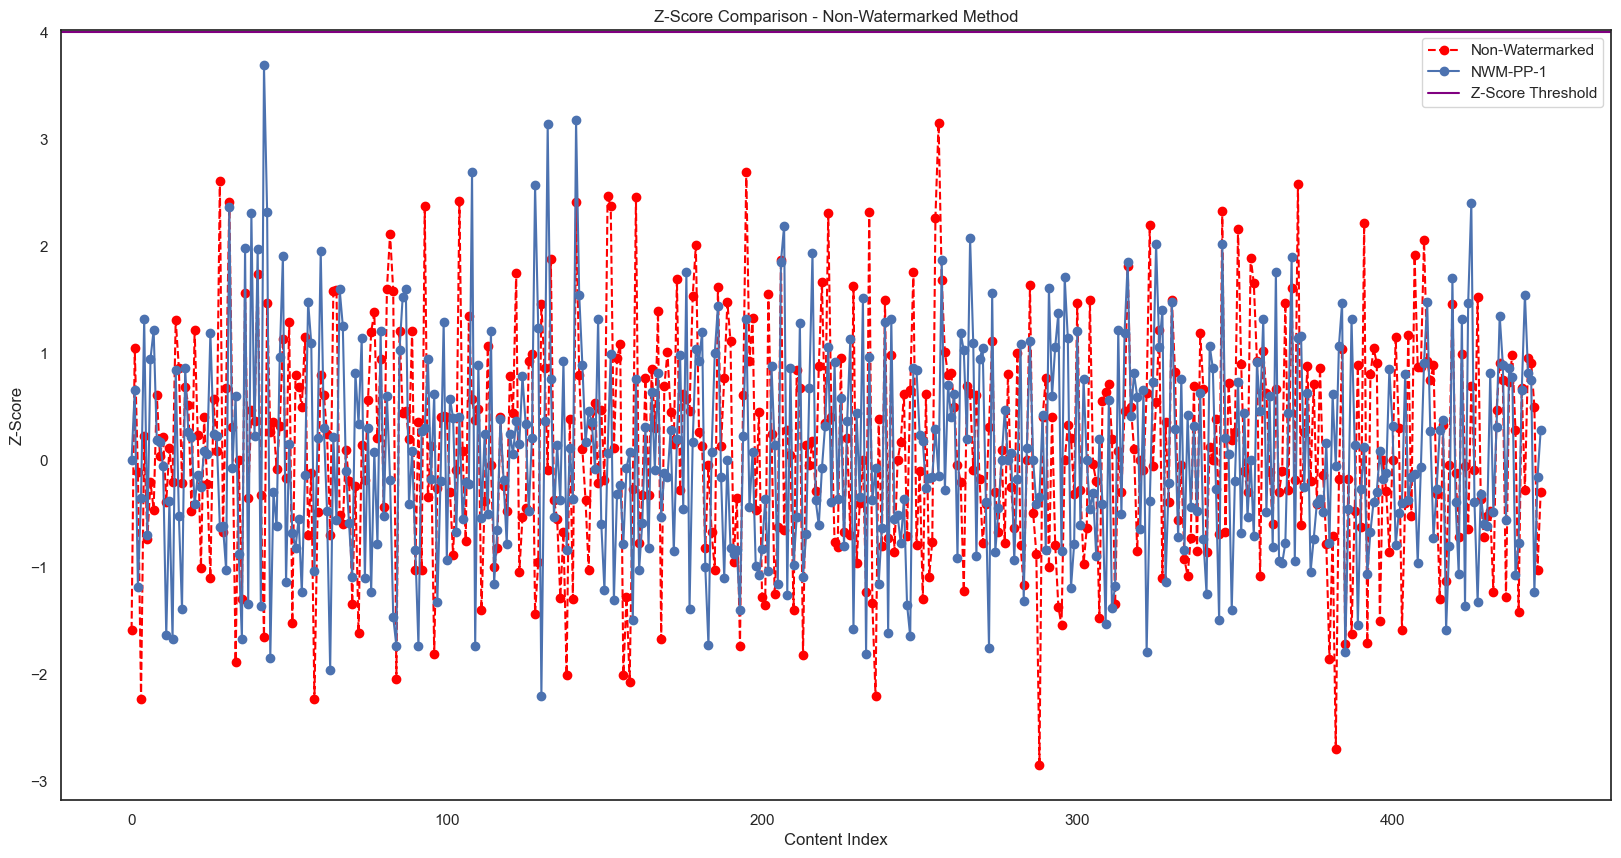

In [158]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(non_wm_zscore))), non_wm_zscore, label="Non-Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(1):
    axs.plot(list(range(len(non_wm_zscore))), nmarked_paraphrased_scores[i], label=f"NWM-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Non-Watermarked Method")
axs.legend(loc='upper right')
# plt.savefig(image_path+"kgw_zscore_non_wmarked_project.png")
plt.show()

## Scatter Plot Visualisation

In [179]:
image_path = "../results/recursive-sentence-paraphrasing/"

sns.set_theme(style='white')

In [180]:
sns.set_palette("pastel")
sampled_df = df

kgw_z_scores = sampled_df["kgw-wm-zscore"]
kgw_pp_z_scores = sampled_df["kgw-sent-zscore-1"]

z_threshold = 4.0

C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


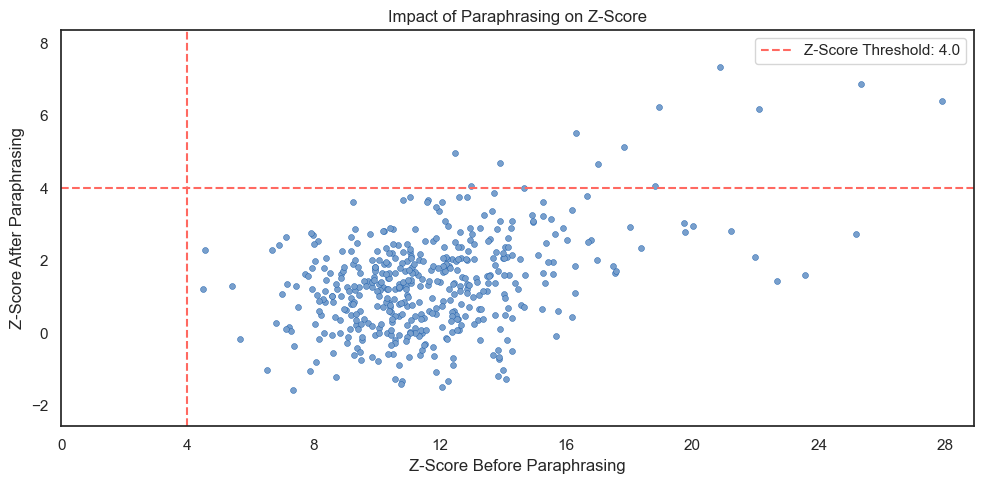

In [181]:
fig, axs = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=kgw_z_scores, y=kgw_pp_z_scores, ax=axs, color='#789FCC', edgecolor="#1E60AD", s=18)

axs.set_xlabel("Z-Score Before Paraphrasing")
axs.set_ylabel("Z-Score After Paraphrasing")

left = min(0, np.min(kgw_z_scores)-1)
right = max(kgw_z_scores)+1
bottom = min(0, np.min(kgw_pp_z_scores)-1)
top = max(kgw_pp_z_scores) + 1

axs.set_xlim(left=left, right=right)
axs.set_ylim(bottom=bottom, top=top)
axs.axhline(z_threshold, label='Z-Score Threshold: 4.0', color='#FF6961', linestyle='--')
axs.axvline(z_threshold, color='#FF6961', linestyle='--')

axs.set_xticks(list(range(0, np.ceil(right).astype(np.int32), 4)))

axs.set_title("Impact of Paraphrasing on Z-Score")
axs.grid(which='minor')

plt.legend()
plt.tight_layout()

plt.savefig(f"{image_path}/z-score-comparison.pdf", bbox_inches='tight', format='pdf')

plt.show()

## Barplot Visualisation Attempt

In [182]:
sns.set_theme(style='white')

In [183]:
sampled_df = df.sample(100).reset_index()

kgw_z_scores = sampled_df["kgw-wm-zscore"]
kgw_pp_z_scores = sampled_df["kgw-sent-zscore-1"]

ordering = np.argsort(kgw_z_scores)[::-1]
kgw_z_scores = kgw_z_scores[ordering]
kgw_pp_z_scores = kgw_pp_z_scores[ordering]

z_threshold = 4.0

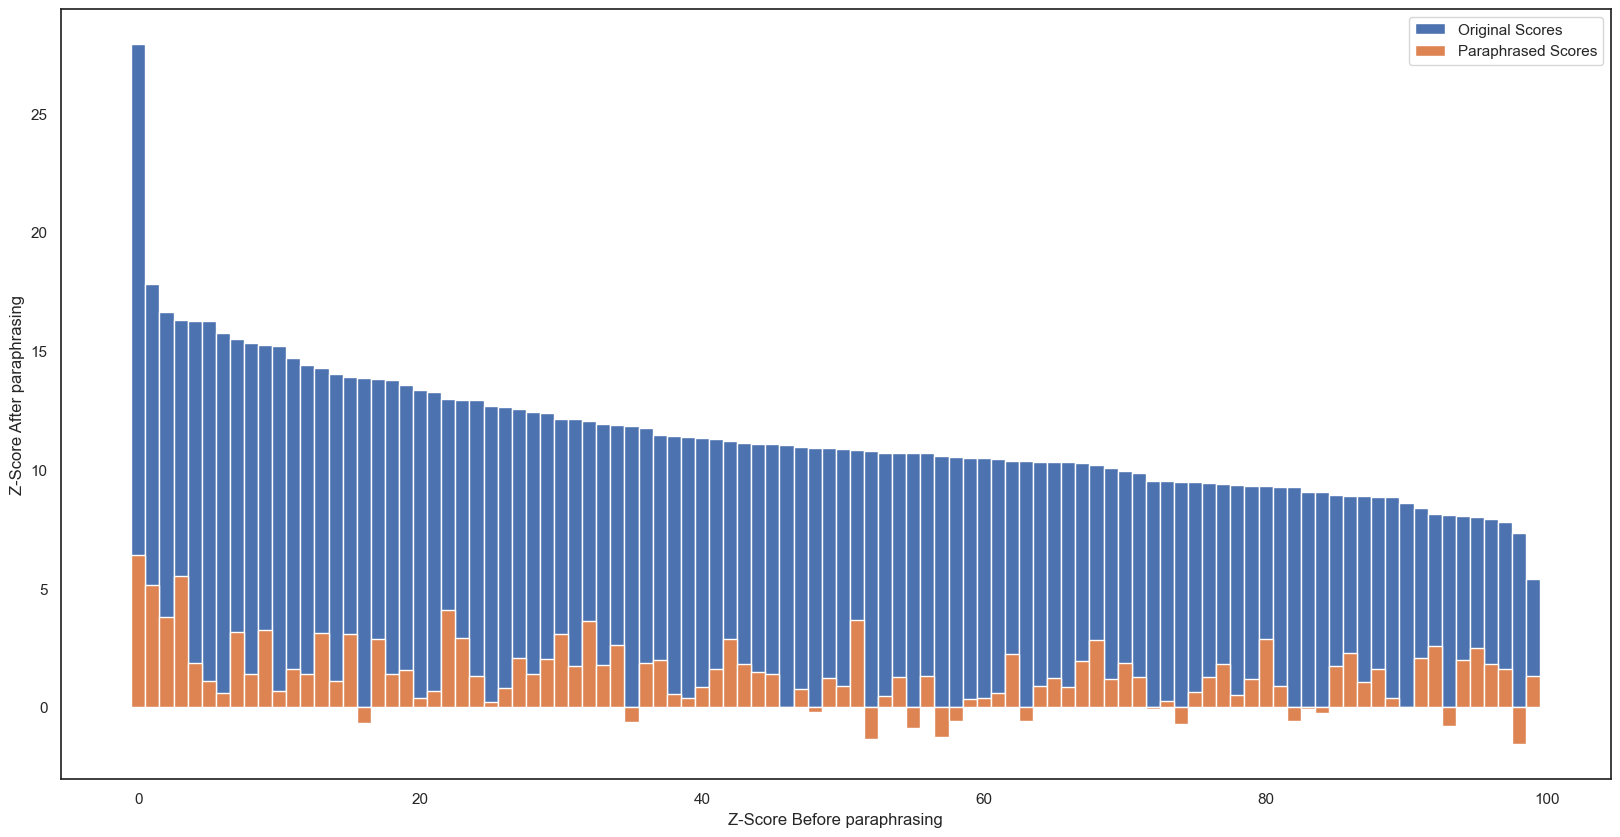

In [184]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.bar(x=list(range(kgw_z_scores.shape[0])), height=kgw_z_scores, width=1, label='Original Scores')
axs.bar(x=list(range(kgw_z_scores.shape[0])), height=kgw_pp_z_scores, width=1, label='Paraphrased Scores')
# sns.barplot(x=list(range(kgw_z_scores.shape[0])), y=kgw_z_scores, ax=axs)

axs.set_xlabel("Z-Score Before paraphrasing")
axs.set_ylabel("Z-Score After paraphrasing")

plt.legend()

plt.show()